### BRAIN TUMOR DETECTION

In [1]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [3]:
import glob
import os
import shutil
import math
import imutils

import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pydicom
%pylab inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

Populating the interactive namespace from numpy and matplotlib


### EDA

In [4]:
ROOT_DIR = 'D:\Projects\Brain Tumor Data Set'

In [5]:
num_of_images = {}

In [6]:
for dir in os.listdir(ROOT_DIR):
    num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
num_of_images

{'Brain Tumor': 391, 'Healthey': 328}

In [8]:
Healthy_Brain = cv2.imread('Not Cancer  (1513).jpg', 
                       cv2.IMREAD_GRAYSCALE)

In [13]:
img = mpimg.imread('/Projects/Brain Tumor Data Set/Healthey/Not Cancer  (1513).jpg')
print(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


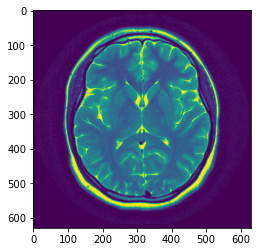

In [20]:
imgplot = plt.imshow(img)

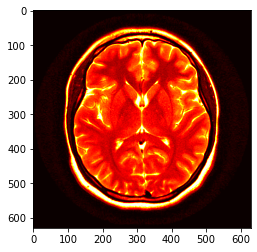

In [22]:
plt.imshow(img, cmap="hot")

In [23]:
UnHealthy_Brain = cv2.imread('Cancer (1631).jpg', 
                       cv2.IMREAD_GRAYSCALE)

In [24]:
img1 = mpimg.imread('D:\Projects\Brain Tumor Data Set\Brain Tumor\Cancer (1631).jpg')
print(img1)

[[[24 24 24]
  [24 24 24]
  [24 24 24]
  ...
  [29 29 29]
  [30 30 30]
  [30 30 30]]

 [[21 21 21]
  [21 21 21]
  [21 21 21]
  ...
  [27 27 27]
  [27 27 27]
  [27 27 27]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]
  ...
  [25 25 25]
  [26 26 26]
  [26 26 26]]

 ...

 [[17 17 19]
  [17 17 19]
  [17 17 19]
  ...
  [20 20 20]
  [20 20 20]
  [20 20 20]]

 [[27 27 29]
  [27 27 29]
  [27 27 29]
  ...
  [28 28 28]
  [28 28 28]
  [28 28 28]]

 [[30 30 32]
  [30 30 32]
  [30 30 32]
  ...
  [29 29 29]
  [29 29 29]
  [29 29 29]]]


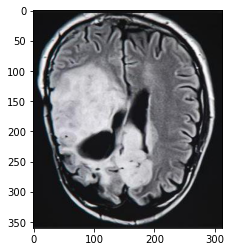

In [25]:
imgplot = plt.imshow(img1)

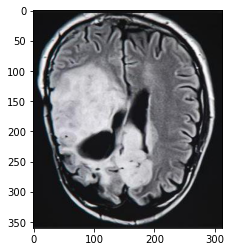

In [26]:
plt.imshow(img1, cmap="hot")

### PRE-PROCESSING

In [7]:
#Create a Training Folder
if not os.path.exists('./train'):
    os.mkdir('./train')
    
    for dir in os.listdir(ROOT_DIR):
        os.makedirs('./train/'+dir)
        
        for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)), size=(math.floor(70/100*num_of_images[dir])-5),replace=False):
            O = os.path.join(ROOT_DIR,dir,img)
            D = os.path.join('./train', dir)
            
            shutil.copy(O,D)
            os.remove(O)
            
else:
    print('Train Folder Exists')
            

In [8]:
#Create a Validation Folder
if not os.path.exists('./val'):
    os.mkdir('./val')
    
    for dir in os.listdir(ROOT_DIR):
        os.makedirs('./val/'+dir)
        
        for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)), size=(math.floor(15/100*num_of_images[dir])-5), replace=False):
            O = os.path.join(ROOT_DIR,dir,img)
            D = os.path.join('./val', dir)
            
            shutil.copy(O,D)
            os.remove(O)
            
else:
    print('Validation Folder Exists')
            

In [9]:
#Create a Validation Folder
if not os.path.exists('./test'):
    os.mkdir('./test')
    
    for dir in os.listdir(ROOT_DIR):
        os.makedirs('./test/'+dir)
        
        for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)), size=(math.floor(15/100*num_of_images[dir])-5),replace=False):
            O = os.path.join(ROOT_DIR,dir,img)
            D = os.path.join('./test', dir)
            
            shutil.copy(O,D)
            os.remove(O)
            
else:
    print('Test Folder Exists')
            

### Model

In [10]:
# CNN
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

### Preparing our data using a data generator

In [11]:
train_datagen = image.ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1./255, horizontal_flip=True)
val_datagen = image.ImageDataGenerator(rescale=1./255)
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [12]:
### Load Data
'''
train = tf.keras.utils.get_file(origin=, fname='train',untar=False)
train = pathlib.Path()
'''

"\ntrain = tf.keras.utils.get_file(origin=, fname='train',untar=False)\ntrain = pathlib.Path()\n"

In [13]:
train_data = train_datagen.flow_from_directory(directory='train', target_size=(224,224), batch_size=32, class_mode='binary')
train_data.class_indices

Found 492 images belonging to 2 classes.


{'Brain Tumor': 0, 'Healthey': 1}

In [14]:
val_data = val_datagen.flow_from_directory(directory='val', target_size=(224,224), batch_size=32, class_mode='binary')
val_data.class_indices

Found 97 images belonging to 2 classes.


{'Brain Tumor': 0, 'Healthey': 1}

In [15]:
test_data = test_datagen.flow_from_directory(directory='test', target_size=(224,224), batch_size=32, class_mode='binary')
test_data.class_indices

Found 97 images belonging to 2 classes.


{'Brain Tumor': 0, 'Healthey': 1}

In [16]:
# To verify how data is doing training, we use model check pointing and early stopping
# Save when it  reaches good accuracy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
E = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

#model checkpoint
M = ModelCheckpoint(filepath = 'best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

#Put callback into a list
call_back = [E, M]


In [17]:
hist = model.fit_generator(generator=train_data, steps_per_epoch=8, epochs=30, verbose=1, validation_data=val_data, validation_steps=16, callbacks=call_back)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.9443 - accuracy: 0.5254WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_accuracy improved from -inf to 0.62887, saving model to best_model.h5
8/8 [==============================] - 7s 923ms/step - loss: 0.9443 - accuracy: 0.5254 - val_loss: 0.6530 - val_accuracy: 0.6289
Epoch 2/30
8/8 [==============================] - 6s 796ms/step - loss: 0.6376 - accuracy: 0.6406
Epoch 3/30
8/8 [==============================] - 6s 737ms/step - loss: 0.7079 - accuracy: 0.5932
Epoch 4/30
8/8 [==============================] - 6s 738ms/step - loss: 0.6386 - accuracy: 0.5890
Epoch 5/30
8/8 [==============================] - 6s 755

8/8 [==============================] - 6s 742ms/step - loss: 0.3914 - accuracy: 0.8178
Epoch 21/30
8/8 [==============================] - 7s 820ms/step - loss: 0.4640 - accuracy: 0.8008
Epoch 22/30
8/8 [==============================] - 6s 812ms/step - loss: 0.5009 - accuracy: 0.7305
Epoch 23/30
8/8 [==============================] - 6s 753ms/step - loss: 0.4154 - accuracy: 0.8263
Epoch 24/30
8/8 [==============================] - 7s 824ms/step - loss: 0.3593 - accuracy: 0.8559
Epoch 25/30
8/8 [==============================] - 6s 765ms/step - loss: 0.4115 - accuracy: 0.8517
Epoch 26/30
8/8 [==============================] - 6s 802ms/step - loss: 0.3388 - accuracy: 0.8594
Epoch 27/30
8/8 [==============================] - 6s 761ms/step - loss: 0.4017 - accuracy: 0.8263
Epoch 28/30
8/8 [==============================] - 6s 810ms/step - loss: 0.3373 - accuracy: 0.8438
Epoch 29/30
8/8 [==============================] - 6s 744ms/step - loss: 0.3663 - accuracy: 0.8602
Epoch 30/30
8/8 [=====

### Loading the Best Model

In [20]:
from tensorflow.keras.models import load_model
model = load_model('best_model.h5')

### Check Model Accuracy

In [21]:
acc = model.evaluate_generator(generator = test_data)[1]
print(f'The accuracy of the model is = {acc*100} %')

Instructions for updating:
Please use Model.evaluate, which supports generators.
The accuracy of the model is = 63.91752362251282 %


In [22]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

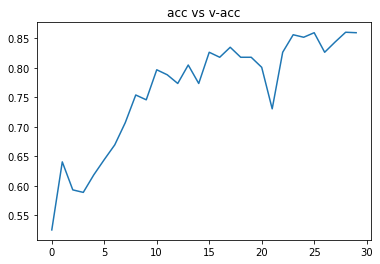

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('acc vs v-acc')
plt.show()